In [5]:

#dropping the first row for all the dataframes
# seperate into multiple dataframes by timeframes
# drop all Nan rows
# conduct the correlation analysis and other EDA formats-By the end of the weekend
'''
!git clone https://github.com/Adnan-Anwar-Data-enthusiast/Currency-speculation.git
'''

'\n!git clone https://github.com/Adnan-Anwar-Data-enthusiast/Currency-speculation.git\n'

In [6]:
!pip install numpy pandas
!pip install openpyxl #attribute to install excel reading
%pip install matplotlib seaborn plotly seaborn yfinance
%pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pandas import to_datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os 
print(os.getcwd())

/workspaces/Currency-speculation


In [8]:
df_whole = pd.read_excel(r'Currency swaps data.xlsx')
with pd.ExcelFile(r'Currency swaps data.xlsx') as xls:
    df_USDJPY = pd.read_excel(xls, 'USDJPY')
    df_USDCHF = pd.read_excel(xls, 'USDCHF')
    df_USDGBP = pd.read_excel(xls, 'USDGBP')
    df_USDEUR = pd.read_excel(xls,'USDEUR')
    df_USDINR = pd.read_excel(xls,'USDINR')
    df_XAUUSD = pd.read_excel(xls,'XAUUSD')
df_USDJPY.head(n=20)
df_list = [df_USDJPY, df_USDCHF, df_USDGBP, df_USDEUR, df_USDINR, df_XAUUSD]

In [9]:
#cleaning missing data. In my method i seperated the initial currency dataframe into 5 seperate data frames. Now since pandas does does not recognize
# different timegframes, i have to fill in my data and clean the missing data from each time frame across all the swaps 


In [10]:
def rename_column(df, str_column_name, str_new_name):
    time_periods = ['1W', '1M', '1Q', '1Y', '2Y', '5Y', '10Y', '15Y', '20Y']
    
    # Match suffix and assign new name accordingly
    for i in range(1, 9):
        if f'.{i}' in str_column_name:
            new_col_name = str_new_name + '_' + time_periods[i]
            df.rename(columns={str_column_name: new_col_name}, inplace=True)
            return df
            

    # If no .1 to .8 is found, assume it's the first (base) column
    df.rename(columns={str_column_name: str_new_name + '_' + time_periods[0]}, inplace=True)
    return df





# function for calling the rename functions across all the swaps
def call_rename(df, str_swap):
    list_space = ['' , 1,2,3,4,5,6,7,8,9]
    for i in range(9):
        if i==0:
            rename_column(df, str_swap+' Curncy', str_swap)
            continue
        else:
            rename_column(df, f'{str_swap} Curncy.{i}', str_swap)
         
    return df




print(call_rename(df_USDJPY, 'USDJPY'))

print(call_rename(df_USDCHF, 'USDCHF'))
print(call_rename(df_USDGBP, 'USDGBP'))
print(call_rename(df_USDEUR, 'USDEUR'))
print(call_rename(df_USDINR, 'USDINR'))
print(call_rename(df_XAUUSD, 'XAU'))

            



# possible reasons
# 1. After calling the first function rename_column, the changes arent being stored
# 2. After calling call_rename, call_rename is not returning the dataframe properly
# 




                      NaN                          USDJPY_1W  \
0                   DATES  dropna(px_last(end=0D,start=-1W))   
1     2025-07-10 00:00:00                             146.26   
2     2025-07-11 00:00:00                             147.43   
3     2025-07-13 00:00:00                             147.19   
4     2025-07-14 00:00:00                             147.72   
...                   ...                                ...   
7302                  NaN                                NaN   
7303                  NaN                                NaN   
7304                  NaN                                NaN   
7305                  NaN                                NaN   
7306                  NaN                                NaN   

                    nan.1                              USDJPY_1M  \
0                   DATES  dropna(px_last(end='0D',start='-1M'))   
1     2025-06-17 00:00:00                                 145.29   
2     2025-06-18 00:00:00  

In [11]:
#calling renaming the dates

def rename_column_dates(df, str_column_name, str_new_name):
    time_periods = ['1W', '1M', '1Q', '1Y', '2Y', '5Y', '10Y', '15Y', '20Y']
    
    # Match suffix and assign new name accordingly
    for i in range(1, 9):
        if f'.{i}' in str_column_name:
            new_col_name = str_new_name + '_' + 'dates_'+time_periods[i]
            df.rename(columns={str_column_name: new_col_name}, inplace=True)
            
        else: #renaming the first column as it is recognized as a float, rather #than a string
            df.columns.values[0] = str_new_name + '_dates_' + time_periods[0]
    return df

#rename_column_dates(df_USDCHF, 'nan.1','USDCHF')

def call_rename_dates(df, str_new_name):
    for i in range(1, 9):#since the end of the range is exclusive, we start from 1 and end at 9 to include the index 8
        rename_column_dates(df, f'nan.{i}', str_new_name)
    return df

call_rename_dates(df_USDCHF, 'USDCHF')
call_rename_dates(df_USDGBP, 'USDGBP')
call_rename_dates(df_USDEUR, 'USDEUR')
call_rename_dates(df_USDINR, 'USDINR')
call_rename_dates(df_XAUUSD, 'XAU')
call_rename_dates(df_USDJPY, 'USDJPY')

        

,USDJPY_dates_1W,USDJPY_1W,USDJPY_dates_1M,USDJPY_1M,USDJPY_dates_1Q,USDJPY_1Q,USDJPY_dates_1Y,USDJPY_1Y,USDJPY_dates_2Y,USDJPY_2Y,USDJPY_dates_5Y,USDJPY_5Y,USDJPY_dates_10Y,USDJPY_10Y,USDJPY_dates_15Y,USDJPY_15Y,USDJPY_dates_20Y,USDJPY_20Y
0,DATES,"dropna(px_last(end=0D,start=-1W))",DATES,"dropna(px_last(end='0D',start='-1M'))",DATES,"dropna(px_last(dates=range(-1Q,0D),per='D'))",DATES,"dropna(px_last(dates=range(-1y,0d),per=D))",DATES,"dropna(px_last(dates=range(-2y,0d),per=D))",DATES,"dropna(px_last(dates=range(-5y,0d),per=D))",DATES,"px_last(dates=range(-10y,0d),per=D)",DATES,"px_last(dates=range(-15y,0d),per=D)",DATES,"px_last(dates=range(-20y,0d),per=D)"
1,2025-07-10 00:00:00,146.26,2025-06-17 00:00:00,145.29,2025-04-17 00:00:00,142.43,2024-07-17 00:00:00,156.2,2023-07-17 00:00:00,138.71,2020-07-17 00:00:00,107.02,2015-07-17 00:00:00,124.09,2010-07-17 00:00:00,NaN,2005-07-17 00:00:00,NaN
2,2025-07-11 00:00:00,147.43,2025-06-18 00:00:00,145.13,2025-04-18 00:00:00,142.18,2024-07-18 00:00:00,157.37,2023-07-18 00:00:00,138.83,2020-07-19 00:00:00,107.13,2015-07-18 00:00:00,NaN,2010-07-18 00:00:00,86.53,2005-07-18 00:00:00,111.98
3,2025-07-13 00:00:00,147.19,2025-06-19 00:00:00,145.45,2025-04-20 00:00:00,142.13,2024-07-19 00:00:00,157.48,2023-07-19 00:00:00,139.65,2020-07-20 00:00:00,107.27,2015-07-19 00:00:00,124.03,2010-07-19 00:00:00,86.69,2005-07-19 00:00:00,112.69
4,2025-07-14 00:00:00,147.72,2025-06-20 00:00:00,146.09,2025-04-21 00:00:00,140.86,2024-07-21 00:00:00,157.44,2023-07-20 00:00:00,140.07,2020-07-21 00:00:00,106.8,2015-07-20 00:00:00,124.27,2010-07-20 00:00:00,87.51,2005-07-20 00:00:00,112.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-13 00:00:00,147.19
7303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-14 00:00:00,147.72
7304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-15 00:00:00,148.88
7305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-16 00:00:00,147.88


In [12]:
#tomorrows task, 
#now that the columns are currectly named, we can move on to cleaning NA data
# look at pandas and numpy for drop NA, after this we can move on to EDA as most data on the terminal is clean
# for each column on the pd df, pandas only recognizes rectangular data frames. This is because pandas loads like that, it really cannot do much
# agenda 
# 1. change the dates
# 1. drop all N/A values
# 2. make the frequency of the data equal

The next part of this is seperating each time frame into multiple data frames, i will create a function for this as if i dont it will require a lot of code

#seperating each of the swaps to different dataframes by time. Lets seperate them by df['column_name']. For multiple columns we must encolose the column name by two square brackets. The reason for two square brackets is cause on set of them is a list of the column names, and another is the dataframe operator 


In [13]:
#if i was to manually seperate them it would look like
#df_USDJPY[['USDJPY_dates_1W','USDJPY_1W']]
#df_USDJPY[['USDJPY_dates_1M','USDJPY_1M']]
#... for all the timeframes and for all the dfs


In [14]:
#cleaning missing data. In my method i seperated the initial currency dataframe into 5 seperate data frames. Now since pandas does does not recognize
# different timegframes, i have to fill in my data and clean the missing data from each time frame across all the swaps 


In [15]:
#tomorrows task, 
#now that the columns are currectly named, we can move on to cleaning NA data
# look at pandas and numpy for drop NA, after this we can move on to EDA as most data on the terminal is clean
# for each column on the pd df, pandas only recognizes rectangular data frames. This is because pandas loads like that, it really cannot do much
# agenda 
# 1. change the dates
# 1. drop all N/A values
# 2. make the frequency of the data equal
split_dataframes = {} #the dictionary we will store the split dataframes in

The next part of this is seperating each time frame into multiple data frames, i will create a function for this as if i dont it will require a lot of code

#seperating each of the swaps to different dataframes by time. Lets seperate them by df['column_name']. For multiple columns we must encolose the column name by two square brackets. The reason for two square brackets is cause on set of them is a list of the column names, and another is the dataframe operator 


In [16]:
df_USDINR = df_USDINR.loc[:, ~df_USDINR.columns.str.contains("Unnamed")]
def split_columns1(df):
    
    for i in range(0, len(df.columns), 2):
        date_col = df.columns[i]
        value_col = df.columns[i + 1]
        # Extract swap and period from value_col, e.g. 'USDJPY_1W'
        try:
            parts = value_col.split('_')
            swap = parts[0]
            period = parts[-1]
            key = f'{swap}_{period}'
            split_dataframes[key] = df[[date_col, value_col]].copy()
        except Exception:
            continue
    return split_dataframes

# Example usage:

In [17]:
USDJPY = split_columns1(df_USDJPY) 
USDCHF = split_columns1(df_USDCHF)
USDGBP = split_columns1(df_USDGBP)
USDEUR = split_columns1(df_USDEUR)
USDINR = split_columns1(df_USDINR)
XAUUSD = split_columns1(df_XAUUSD)


In [18]:
#seperating into different columns
USDJPY_1W = USDJPY['USDJPY_1W']
USDJPY_1M = USDJPY['USDJPY_1M']
USDJPY_1Q = USDJPY['USDJPY_1Q']
USDJPY_1Y = USDJPY['USDJPY_1Y']
USDJPY_2Y = USDJPY['USDJPY_2Y']
USDJPY_5Y = USDJPY['USDJPY_5Y']
USDJPY_10Y = USDJPY['USDJPY_10Y']
USDJPY_15Y = USDJPY['USDJPY_15Y']
USDJPY_20Y = USDJPY['USDJPY_20Y']

USDCHF_1W = USDCHF['USDCHF_1W']
USDCHF_1M = USDCHF['USDCHF_1M']
USDCHF_1Q = USDCHF['USDCHF_1Q']
USDCHF_1Y = USDCHF['USDCHF_1Y']
USDCHF_2Y = USDCHF['USDCHF_2Y']
USDCHF_5Y = USDCHF['USDCHF_5Y']
USDCHF_10Y = USDCHF['USDCHF_10Y']
USDCHF_15Y = USDCHF['USDCHF_15Y']
USDCHF_20Y = USDCHF['USDCHF_20Y']

USDGBP_1W = USDGBP['USDGBP_1W']
USDGBP_1M = USDGBP['USDGBP_1M']
USDGBP_1Q = USDGBP['USDGBP_1Q']
USDGBP_1Y = USDGBP['USDGBP_1Y']
USDGBP_2Y = USDGBP['USDGBP_2Y']
USDGBP_5Y = USDGBP['USDGBP_5Y']
USDGBP_10Y = USDGBP['USDGBP_10Y']
USDGBP_15Y = USDGBP['USDGBP_15Y']
USDGBP_20Y = USDGBP['USDGBP_20Y']

USDEUR_1W = USDEUR['USDEUR_1W']
USDEUR_1M = USDEUR['USDEUR_1M']
USDEUR_1Q = USDEUR['USDEUR_1Q']
USDEUR_1Y = USDEUR['USDEUR_1Y']
USDEUR_2Y = USDEUR['USDEUR_2Y']
USDEUR_5Y = USDEUR['USDEUR_5Y']
USDEUR_10Y = USDEUR['USDEUR_10Y']
USDEUR_15Y = USDEUR['USDEUR_15Y']
USDEUR_20Y = USDEUR['USDEUR_20Y']

USDINR_1W = USDINR['USDINR_1W']
USDINR_1M = USDINR['USDINR_1M']
USDINR_1Q = USDINR['USDINR_1Q']
USDINR_1Y = USDINR['USDINR_1Y']
USDINR_2Y = USDINR['USDINR_2Y']
USDINR_5Y = USDINR['USDINR_5Y']
USDINR_10Y = USDINR['USDINR_10Y']
USDINR_15Y = USDINR['USDINR_15Y']
USDINR_20Y = USDINR['USDINR_20Y']

XAU_1W = XAUUSD['XAU_1W']
XAU_1M = XAUUSD['XAU_1M']
XAU_1Q = XAUUSD['XAU_1Q']
XAU_1Y = XAUUSD['XAU_1Y']
XAU_2Y = XAUUSD['XAU_2Y']
XAU_5Y = XAUUSD['XAU_5Y']
XAU_10Y = XAUUSD['XAU_10Y']
XAU_15Y = XAUUSD['XAU_15Y']
XAU_20Y = XAUUSD['XAU_20Y']

# Now we have all the individual dataframes for each currency and timeframe
# You can perform further analysis or save them as needed





In [19]:
## Display the keys of the split_dataframes dictionary
# This will show the names of the dataframes created for each currency and timeframe
list_of_dict_keys = list(split_dataframes)
print(list_of_dict_keys)
#Stores the keys for later cleaning
for i in list_of_dict_keys:
    split_dataframes[i].dropna(inplace=True)  # Drop rows with any NaN values
    #print(split_dataframes[i].head())  # Display the first few rows of each dataframe
    #print(split_dataframes[i].columns)  # Display the columns of each dataframe
    #print(split_dataframes[i].info())  # Display the info of each dataframe
    #print(split_dataframes[i].describe())  # Display the descriptive statistics of each dataframe



['USDJPY_1W', 'USDJPY_1M', 'USDJPY_1Q', 'USDJPY_1Y', 'USDJPY_2Y', 'USDJPY_5Y', 'USDJPY_10Y', 'USDJPY_15Y', 'USDJPY_20Y', 'USDCHF_1W', 'USDCHF_1M', 'USDCHF_1Q', 'USDCHF_1Y', 'USDCHF_2Y', 'USDCHF_5Y', 'USDCHF_10Y', 'USDCHF_15Y', 'USDCHF_20Y', 'USDGBP_1W', 'USDGBP_1M', 'USDGBP_1Q', 'USDGBP_1Y', 'USDGBP_2Y', 'USDGBP_5Y', 'USDGBP_10Y', 'USDGBP_15Y', 'USDGBP_20Y', 'USDEUR_1W', 'USDEUR_1M', 'USDEUR_1Q', 'USDEUR_1Y', 'USDEUR_2Y', 'USDEUR_5Y', 'USDEUR_10Y', 'USDEUR_15Y', 'USDEUR_20Y', 'USDINR_1W', 'USDINR_1M', 'USDINR_1Q', 'USDINR_1Y', 'USDINR_2Y', 'USDINR_5Y', 'USDINR_10Y', 'USDINR_15Y', 'USDINR_20Y', 'XAU_1W', 'XAU_1M', 'XAU_1Q', 'XAU_1Y', 'XAU_2Y', 'XAU_5Y', 'XAU_10Y', 'XAU_15Y', 'XAU_20Y']


In [20]:
#dropping the first row for all the dataframes
for key in split_dataframes:
    split_dataframes[key].drop(split_dataframes[key].index[0], inplace=True)  # Drop the first row
    split_dataframes[key].reset_index(drop=True, inplace=True)  # Reset the index after dropping the row


In [21]:
USDJPY_20Y['USDJPY_dates_20Y'] = pd.to_datetime(USDJPY_20Y['USDJPY_dates_20Y'], errors='coerce')
USDJPY_20Y['USDJPY_20Y'] = pd.to_numeric(USDJPY_20Y['USDJPY_20Y'], errors='coerce')

#using this same implementation for all the other datafreames enclosed wihtin a function
def clean_dataframes_to_date_time_and_numeric(df):
    for column in df.columns:
        if 'dates' in column:
            df[column] = pd.to_datetime(df[column], errors='coerce')
        else:
            df[column] = pd.to_numeric(df[column], errors='coerce')
clean_dataframes_to_date_time_and_numeric(USDJPY_20Y)
clean_dataframes_to_date_time_and_numeric(USDCHF_20Y)
clean_dataframes_to_date_time_and_numeric(USDGBP_20Y)
clean_dataframes_to_date_time_and_numeric(USDEUR_20Y)
clean_dataframes_to_date_time_and_numeric(USDINR_20Y)
clean_dataframes_to_date_time_and_numeric(XAU_20Y)






In [22]:
#adding a month year column to each dataframe
def add_month_year_column(df):
    for column in df.columns:
        if 'dates' in column.lower():
            df['month'] = df[column].dt.month
            df['year'] = df[column].dt.year
            df['month-year'] = df[column].dt.to_period('M')
    df.drop(columns=['month', 'year'], inplace=True)  # Optionally drop month and year columns if not needed
    return df
add_month_year_column(USDJPY_20Y)
add_month_year_column(USDCHF_20Y)
add_month_year_column(USDGBP_20Y)
add_month_year_column(USDEUR_20Y)
add_month_year_column(USDINR_20Y)
add_month_year_column(XAU_20Y)


,XAU_dates_20Y,XAU_20Y,month-year
0,2005-07-18,421.05,2005-07
1,2005-07-19,420.10,2005-07
2,2005-07-20,423.15,2005-07
3,2005-07-21,425.60,2005-07
4,2005-07-22,425.00,2005-07
...,...,...,...
5322,2025-07-11,3355.59,2025-07
5323,2025-07-14,3343.51,2025-07
5324,2025-07-15,3324.55,2025-07
5325,2025-07-16,3347.13,2025-07


In [23]:
def group_by_month_year_mean(df):
    # Group by 'month-year' and calculate the mean for each group
    grouped_df = df.groupby('month-year').mean().reset_index()
    for column in grouped_df.columns:
        if 'dates' in column.lower():
            grouped_df.drop(columns=column, inplace=True)  # Drop date columns if they exist

    return grouped_df
grouped_USDJPY = group_by_month_year_mean(USDJPY_20Y)
grouped_USDCHF = group_by_month_year_mean(USDCHF_20Y)
grouped_USDGBP = group_by_month_year_mean(USDGBP_20Y)
grouped_USDEUR = group_by_month_year_mean(USDEUR_20Y)
grouped_USDINR = group_by_month_year_mean(USDINR_20Y)
grouped_XAU = group_by_month_year_mean(XAU_20Y)
# Display the grouped dataframes





In [24]:
# merging the grouped dataframes into a single dataframe
def merge_grouped_dataframes(dfs):
    merged_df = pd.DataFrame()
    for df in dfs:
        if merged_df.empty:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='month-year', how='outer')
    merged_df.dropna(inplace=True)  # Drop rows with any NaN values after merging
    merged_df.reset_index(drop=True, inplace=True)  # Reset the index after merging
    #adding  a base currency column of USD
    merged_df['USD_base'] = [1 for i in range(len(merged_df))]
    return merged_df
merged_df_month_year = merge_grouped_dataframes([grouped_USDJPY, grouped_USDCHF, grouped_USDGBP, grouped_USDEUR, grouped_USDINR, grouped_XAU])
print(merged_df_month_year.head())  # Display the first few rows of the merged dataframe


  month-year  USDJPY_20Y  USDCHF_20Y  USDGBP_20Y  USDEUR_20Y  USDINR_20Y  \
0    2005-07  112.028000    1.292880    0.572810    0.827400   43.463260   
1    2005-08  110.613478    1.262461    0.557183    0.813013   43.633373   
2    2005-09  111.194545    1.265841    0.553277    0.816777   43.914050   
3    2005-10  114.873333    1.287319    0.566614    0.831314   44.844200   
4    2005-11  118.460909    1.310073    0.576300    0.847832   45.711768   

      XAU_20Y  USD_base  
0  424.755000         1  
1  438.066522         1  
2  456.827273         1  
3  469.913810         1  
4  477.751364         1  


In [25]:
# correlation analysis
# step 1 calculate the log returns for each currency based ont the merged dataframe since daily data may be too much noise
def calculate_log_returns(df):
    for column in df.columns:
        if df[column].dtype == float:  # detects if the column is numeric, which means the price
            df['log_returns' + "_"+column] = np.log(df[column] / df[column].shift(1))
            df.dropna(inplace=True)  # Drop rows with any NaN values after calculating log returns
            df.reset_index(drop=True, inplace=True)  # Reset the index after calculating log returns
    return df
calculate_log_returns(merged_df_month_year)







,month-year,USDJPY_20Y,USDCHF_20Y,USDGBP_20Y,USDEUR_20Y,USDINR_20Y,XAU_20Y,USD_base,log_returns_USDJPY_20Y,log_returns_USDCHF_20Y,log_returns_USDGBP_20Y,log_returns_USDEUR_20Y,log_returns_USDINR_20Y,log_returns_XAU_20Y
0,2006-01,115.544091,1.278345,0.566100,0.825191,44.396320,550.178636,1,-0.024493,-0.021173,-0.011925,-0.021703,-0.027078,0.076521
1,2006-02,117.895500,1.305380,0.572095,0.837400,44.324690,555.627500,1,0.020146,0.020928,0.010534,0.014687,-0.001615,0.009855
2,2006-03,117.346522,1.304513,0.573283,0.831148,44.496104,558.296957,1,-0.004667,-0.000664,0.002074,-0.007494,0.003860,0.004793
3,2006-04,116.982000,1.281985,0.565340,0.814270,44.946258,611.858000,1,-0.003111,-0.017420,-0.013951,-0.020516,0.010066,0.091609
4,2006-05,111.844348,1.218826,0.535057,0.783139,45.362557,673.022609,1,-0.044912,-0.050521,-0.055055,-0.038982,0.009220,0.095279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2025-03,149.148846,0.883896,0.774800,0.925754,86.572368,2987.156667,1,-0.016276,-0.022093,-0.029248,-0.036811,-0.005879,0.030941
231,2025-04,144.203462,0.833915,0.760796,0.890938,85.506594,3223.240000,1,-0.033720,-0.058208,-0.018239,-0.038333,-0.012387,0.076065
232,2025-05,144.779615,0.829454,0.748604,0.887065,85.283875,3289.751818,1,0.003987,-0.005364,-0.016156,-0.004357,-0.002608,0.020425
233,2025-06,144.590385,0.813850,0.737650,0.867923,85.935833,3352.664286,1,-0.001308,-0.018991,-0.014740,-0.021816,0.007615,0.018943


In [26]:
merged_df_month_year.to_csv('merged_df_month_year.csv', index=False)  # Save the merged dataframe to a CSV file

['log_returns_USDJPY_20Y',
 'log_returns_USDCHF_20Y',
 'log_returns_USDGBP_20Y',
 'log_returns_USDEUR_20Y',
 'log_returns_USDINR_20Y',
 'log_returns_XAU_20Y']

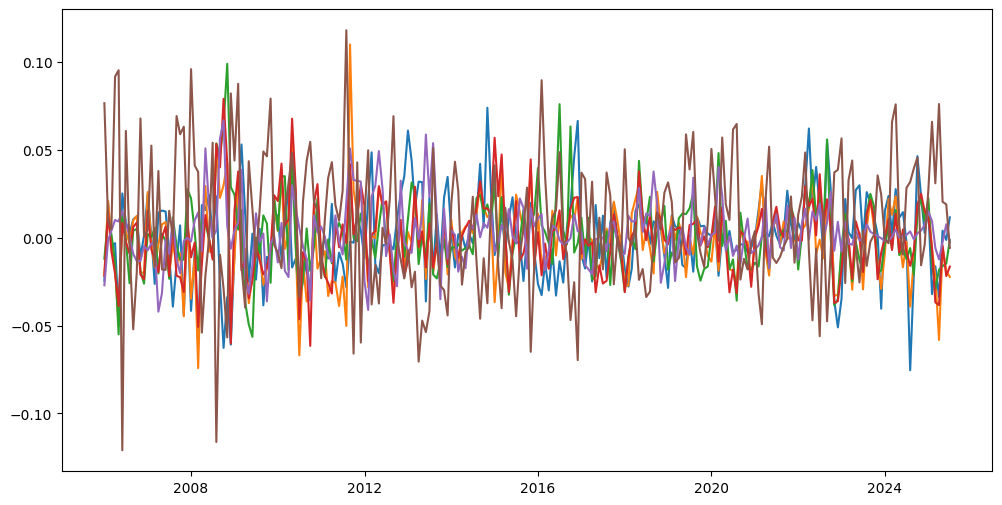

In [27]:
# graphing the log returns
#changing the d type of 
log_columns= []
merged_df_month_year['month-year'] = merged_df_month_year['month-year' ].dt.to_timestamp()
#we have to change  
def plot_log_returns(df):
    #change the 'month-year' column to datetime format for better plotting from period format

    
    
    plt.figure(figsize=(12, 6))
    for column in df.columns:
        if 'log_returns' in column:
            log_columns.append(column)
            plt.plot(df['month-year'], df[column], label=column)
    return log_columns
    plt.title('Log Returns of Currencies Over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.yscale('symlog')
    plt.grid()
    plt.show()
plot_log_returns(merged_df_month_year)

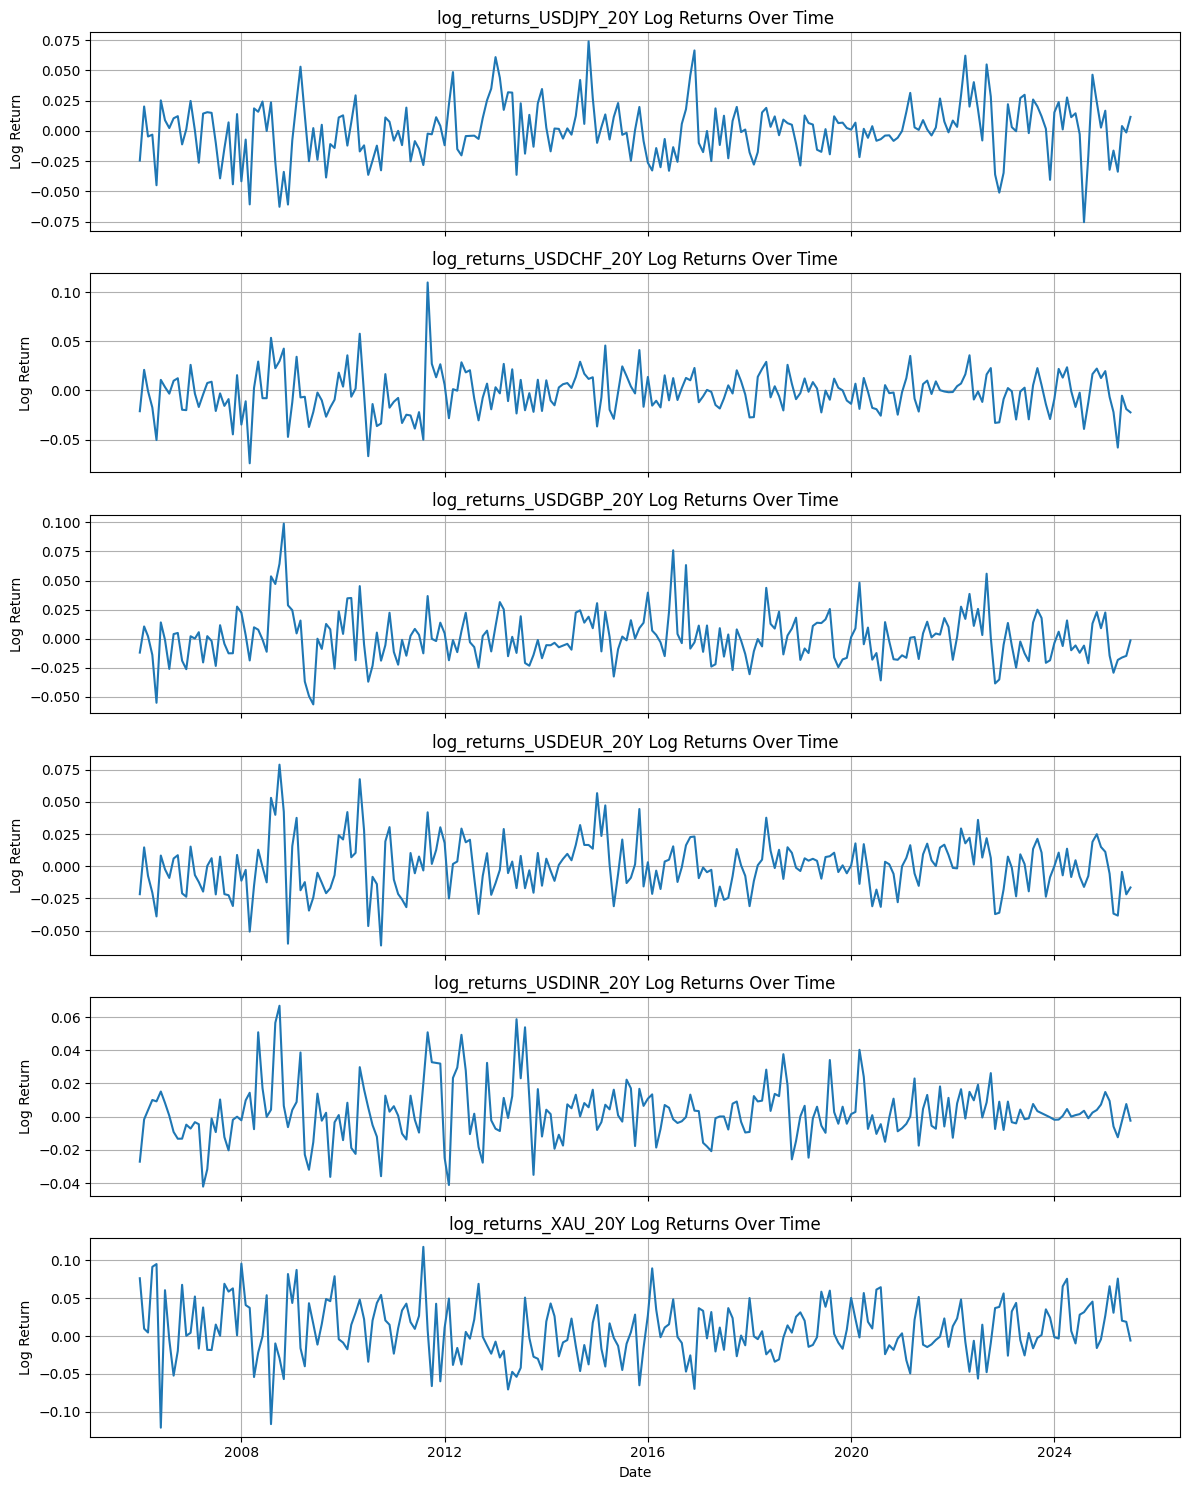

In [28]:
#add subplots here

def plot_currency_log_returns(df, currency_cols, date_col='date', log_y=False):
    """
    Plots time series of log returns for each currency in separate subplots.

    Parameters:
        df (DataFrame): Your DataFrame with log returns.
        currency_cols (list): List of column names for currency log returns.
        date_col (str): Name of the column with date/time.
        log_y (bool): If True, sets y-axis to logarithmic scale.
    """
    n = len(currency_cols)
    fig, axs = plt.subplots(n, 1, figsize=(12, 2.5 * n), sharex=True)

    for i, currency in enumerate(currency_cols):
        axs[i].plot(df['month-year'], df[currency], label=currency)
        axs[i].set_title(f'{currency} Log Returns Over Time')
        axs[i].set_ylabel('Log Return')
        axs[i].grid(True)
        if log_y:
            axs[i].set_yscale('symlog')

    axs[-1].set_xlabel('Date')
    plt.tight_layout()
    plt.show()
plot_currency_log_returns(df = merged_df_month_year, currency_cols=log_columns)

In [29]:
merged_df_month_year.tail()

,month-year,USDJPY_20Y,USDCHF_20Y,USDGBP_20Y,USDEUR_20Y,USDINR_20Y,XAU_20Y,USD_base,log_returns_USDJPY_20Y,log_returns_USDCHF_20Y,log_returns_USDGBP_20Y,log_returns_USDEUR_20Y,log_returns_USDINR_20Y,log_returns_XAU_20Y
230,2025-03-01,149.148846,0.883896,0.774800,0.925754,86.572368,2987.156667,1,-0.016276,-0.022093,-0.029248,-0.036811,-0.005879,0.030941
231,2025-04-01,144.203462,0.833915,0.760796,0.890938,85.506594,3223.240000,1,-0.033720,-0.058208,-0.018239,-0.038333,-0.012387,0.076065
232,2025-05-01,144.779615,0.829454,0.748604,0.887065,85.283875,3289.751818,1,0.003987,-0.005364,-0.016156,-0.004357,-0.002608,0.020425
233,2025-06-01,144.590385,0.813850,0.737650,0.867923,85.935833,3352.664286,1,-0.001308,-0.018991,-0.014740,-0.021816,0.007615,0.018943
234,2025-07-01,146.271333,0.795869,0.736600,0.853729,85.729723,3333.240769,1,0.011559,-0.022341,-0.001424,-0.016490,-0.002401,-0.005810


2. Second part of project making the regression model. For the linear regressions, we will likely not split using time series forecasting

grouped_USDJPY_interest_diff